In [1]:
import pandas as pd

In [8]:
test = pd.read_csv("./data/california_housing_test.csv")
train = pd.read_csv("./data/california_housing_train.csv")

test.shape, train.shape

((3000, 9), (17000, 9))

In [9]:
train.info, test.info

(<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0        -114.31     34.19                15.0       5612.0          1283.0   
 1        -114.47     34.40                19.0       7650.0          1901.0   
 2        -114.56     33.69                17.0        720.0           174.0   
 3        -114.57     33.64                14.0       1501.0           337.0   
 4        -114.57     33.57                20.0       1454.0           326.0   
 ...          ...       ...                 ...          ...             ...   
 16995    -124.26     40.58                52.0       2217.0           394.0   
 16996    -124.27     40.69                36.0       2349.0           528.0   
 16997    -124.30     41.84                17.0       2677.0           531.0   
 16998    -124.30     41.80                19.0       2672.0           552.0   
 16999    -124.35     40.54                52.0       1820.0           300.0   
 
      

In [10]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [11]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


* 이 데이터는 경도, 위도 데이터가 있다.
* info() 결측치 확인 : 결측치가 없다
* info()  자료형의 타입이 수치형이 대부분
* total_bedrooms : 최소값이 1이고 최대값이 6445 이다.   #print(train['total_bedrooms'].min())

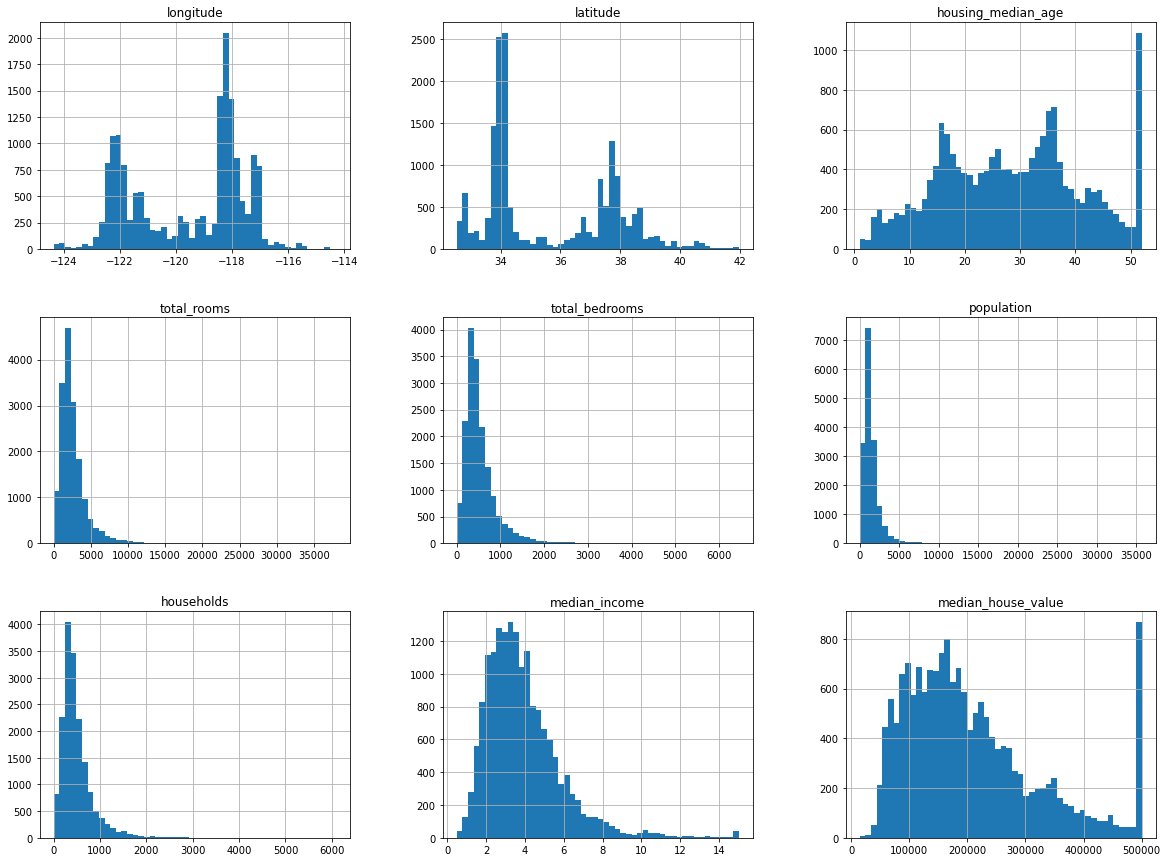

In [12]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))  #bins : 막대기 넓이 조절
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

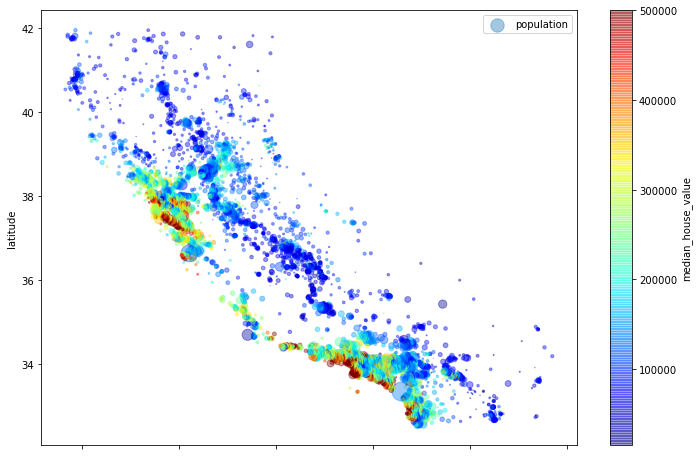

In [13]:
### 위도 경도에 따른 산점도 분포
train.plot(kind="scatter",
           x="longitude", y="latitude",
           alpha=0.4, s=train["population"]/100,   # s:size(점의 크기), 해당인구를 100으로 나눔/alpha: 데이터가 엄청 많을 경우에, 
label="population", c="median_house_value",
figsize=(12,8),   #그래프 크기 조절
cmap=plt.get_cmap("jet"), colorbar=True)    # colorbar 점의 색깔을 알려주는 것 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

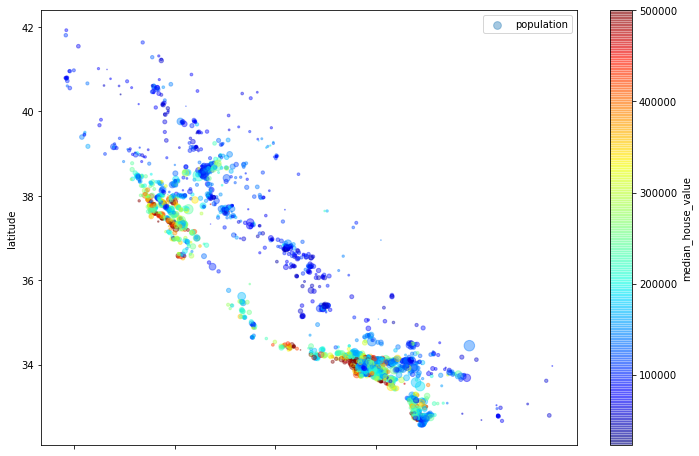

In [14]:
### 위도 경도에 따른 산점도 분포
test.plot(kind="scatter",
           x="longitude", y="latitude",
           alpha=0.4, s=test["population"]/100,   # s:size(점의 크기), 해당인구를 100으로 나눔/alpha: 데이터가 엄청 많을 경우에, 
label="population", c="median_house_value",
figsize=(12,8),   #그래프 크기 조절
cmap=plt.get_cmap("jet"), colorbar=True)

In [15]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [16]:
train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [17]:
sel = ['total_rooms', 'total_bedrooms', 'population']
temp_train = train[ sel ]

In [18]:
temp_train.describe()

,total_rooms,total_bedrooms,population
count,17000.000000,17000.000000,17000.000000
mean,2643.664412,539.410824,1429.573941
std,2179.947071,421.499452,1147.852959
min,2.000000,1.000000,3.000000
25%,1462.000000,297.000000,790.000000
50%,2127.000000,434.000000,1167.000000
75%,3151.250000,648.250000,1721.000000
max,37937.000000,6445.000000,35682.000000


### 실습1-1  total_rooms 37937의 위치와 정보 얻기

In [19]:
# 조건문을 사용해서 True,False로 찾기 
max_room_info = train.loc[train['total_rooms']==37937, :]
max_room_info

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0


## -------------------

In [20]:
sel = ['total_rooms', 'total_bedrooms', 'population']
temp_train = train[ sel ]

temp_train.describe()

,total_rooms,total_bedrooms,population
count,17000.000000,17000.000000,17000.000000
mean,2643.664412,539.410824,1429.573941
std,2179.947071,421.499452,1147.852959
min,2.000000,1.000000,3.000000
25%,1462.000000,297.000000,790.000000
50%,2127.000000,434.000000,1167.000000
75%,3151.250000,648.250000,1721.000000
max,37937.000000,6445.000000,35682.000000


In [21]:
import seaborn as sns

<AxesSubplot:xlabel='population'>

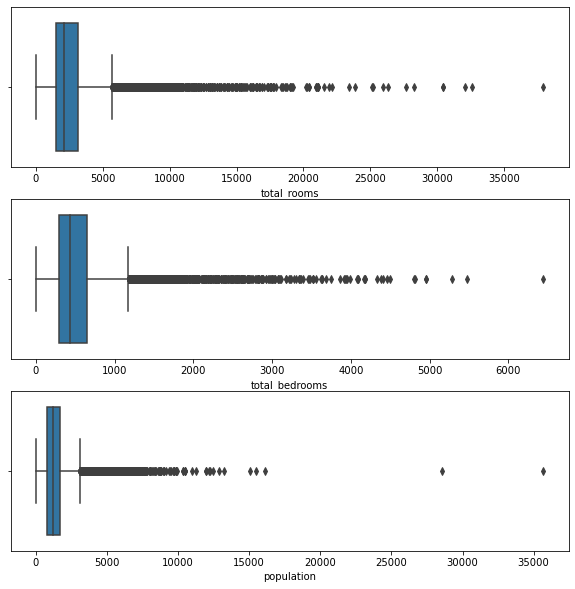

In [34]:
# boxplot은 50%, 70% 밀집도? 를 보는것?
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.boxplot(x="total_rooms", data=temp_train)
plt.subplot(3,1,2)
sns.boxplot(x="total_bedrooms", data=temp_train)
plt.subplot(3,1,3)
sns.boxplot(x="population", data=temp_train)

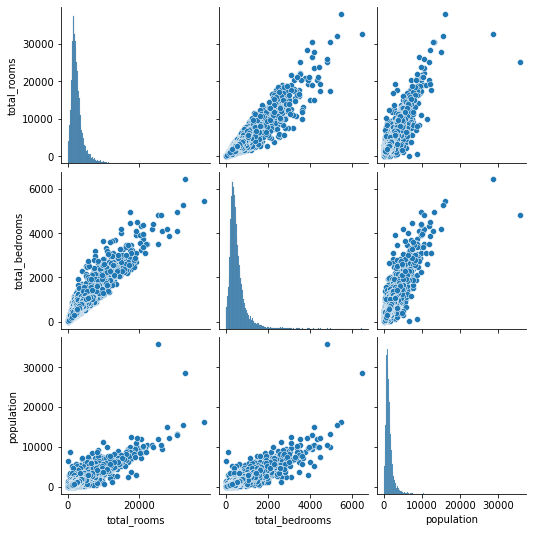

In [35]:
sns.pairplot(temp_train)

In [36]:
# 상관관계
temp_train.corr()

,total_rooms,total_bedrooms,population
total_rooms,1.000000,0.928403,0.860170
total_bedrooms,0.928403,1.000000,0.881169
population,0.860170,0.881169,1.000000


In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,9):
    plt.subplot(3,3,i)
    sns.boxplot(x=train.columns[i], data = train)
plt.show()

In [ ]:
train

In [ ]:
train.total_rooms.describe()

In [ ]:
tmp_A1 = train[ train['total_rooms']>= 3151, :]
tmp_A2 = train[ train['total_rooms']>= 2127 & train['total_rooms']<= 3151, :]
tmp_A3 = train[ train['total_rooms']>= 1462 & train['total_rooms']<= 2127, :]
tmp_A4 = train[ train['total_rooms']>= 1462 & train['total_rooms']<= 3151, :]

tmp_A1.shape,tmp_A2.shape,tmp_A3.shape,tmp_A4.shape

In [ ]:
# 새로운 열 추가 하기
tmp_A1 = train[ train['total_rooms']>= 3151, "room_level1"] =1  # 열 자리에, 열 이름을 새로 쓰면, 열이 새로 생긴다. 
tmp_A2 = train[ train['total_rooms']>= 2127 & train['total_rooms']<= 3151, "room_level"]=2
tmp_A3 = train[ train['total_rooms']>= 1462 & train['total_rooms']<= 2127, "room_level"]=3
tmp_A4 = train[ train['total_rooms']>= 1462 & train['total_rooms']<= 3151, "room_level"]=4

In [ ]:
train.columns

In [ ]:
train.room_level.astype('category')
